<strong>FIRST OF ALL IMPORT ALL THE LIBRARIES THAT WE NEED DURING OUR VISULIZATION.
BASIC LIBRARY THAT WE NEED ARE:
1.NUMPY:NUMERICAL PYTHON FOR NUMERIC CALCULATION    
    
2.MATLPLOTLIB : PLOTTING OF GRAPHS AND PLOTTING IS DONE USING It
        
3.SEABORN : EXTENSION OF MATLPLOTLIB GIVES US WIDE RANGE OF PLOTING EXPERIENCE

4.MATH : FOR MATHEMATICAL CALCULATION</strong>

In [515]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
%matplotlib inline

<font color='green'>Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.
In the figure above, X (input) is the work experience and Y (output) is the salary of a person. The regression line is the best fit line for our model.</font>

HERE WE ARE READING THE DATASET USING PANDA LIBRARY

In [516]:
df=pd.read_csv("remissionoflekemia.csv")
df.head(5)

,Unnamed: 0,time,cens,group
0,1,9,1,1
1,2,13,1,1
2,3,13,0,1
3,4,18,1,1
4,5,23,1,1


<font color ='red'>LETS UNDERSTAND THE DATABASE:</font>


THE FOLLOWING DATASET IS ABOUT Remission Times for Acute Myelogenous Leukaemia and how the cells form group with
respect to time and cens. 

AS ABOVE ALGORTHM SAYS ONLY SINGLE HIGHER INFLUENCING FEATURE IS SELECTED 
FROM THE DATABASE WE WILL SEE


PLOTS BETWEEN DIFFERENT FEATURES(INDEPENDENT VARIABLE) AND DEPENDENT VARIABLE(HERE 'group') WHICH IS 
INFLUINCING it MOST

LETS CHECK ANY MISSING VALUES ARE THERE OR NOT IN OUR DATA SET USING HEATMAP UNDER SEABORN LIBRARY

In [517]:
df=df.loc[:,~df.columns.str.contains('^Unnamed')]   #Removing the unnamed cloumn we dont actually need it
df

,time,cens,group
0,9,1,1
1,13,1,1
2,13,0,1
3,18,1,1
4,23,1,1
5,28,0,1
6,31,1,1
7,34,1,1
8,45,0,1
9,48,1,1


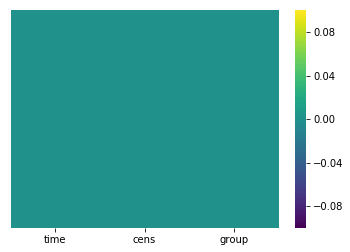

In [518]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')#Result shows no null value

In [519]:
df.isnull().sum()#all should be zero we dont want any null values

time     0
cens     0
group    0
dtype: int64

<strong><font color='blue'>WE NOW DEFINE A COUNT PLOT TO SEE THE VARIATION IN THE DEPENDENT VARIABLE THAT IS WHAT ARE ITS DIFFERENT 
POSSIBLE VALUES AND WHAT IS THERE INDIVIDUAL COUNT=======></font></strong>

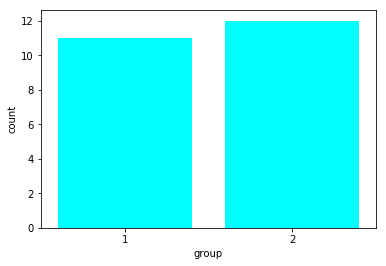

In [520]:
sns.countplot(x='group',data=df,color='cyan',saturation=1)#we see more 0's or its density is more

WE NOW CHECK WHICH FACOR AFFECTS MOST OUR DEPENDENT VARIABLE

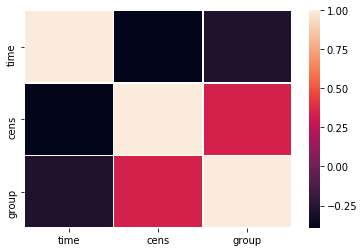

In [523]:
sns.heatmap(df.corr(), linewidths=.5)#Compute pairwise correlation of columns, excluding NA/null values.

In [525]:
print("From the Above plot we can beautifully imagine how 'cens' is strongly correlated to 'group' and it is the factor affecting it \n most with the probiblity more than 0.6")

From the Above plot we can beautifully imagine how 'cens' is strongly correlated to 'group' and it is the factor affecting it 
 most with the probiblity more than 0.6


LETS CHECK THEIR HISTOGRAMS

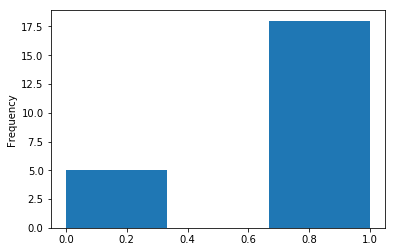

In [526]:
df["group"].plot.hist(by='group',bins=3)

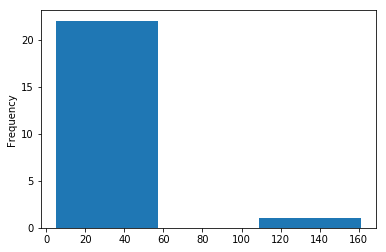

In [529]:
df["time"].plot.hist(by='group',bins=3)

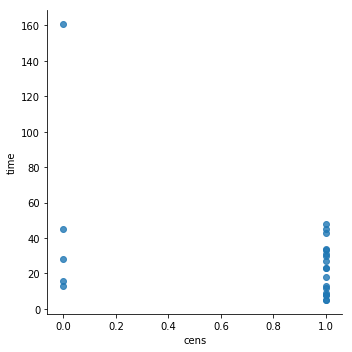

In [531]:
sns.lmplot(x="cens",y="time",data=df,fit_reg=False) #to visualise a regression between two variables here is cens and time. 

TO MAKE VISUALIZTION MORE CLEAR PLOT A 3D GRAPH INCLUDING ALL THE FEATURES AND DEPENDENT VARIABLE

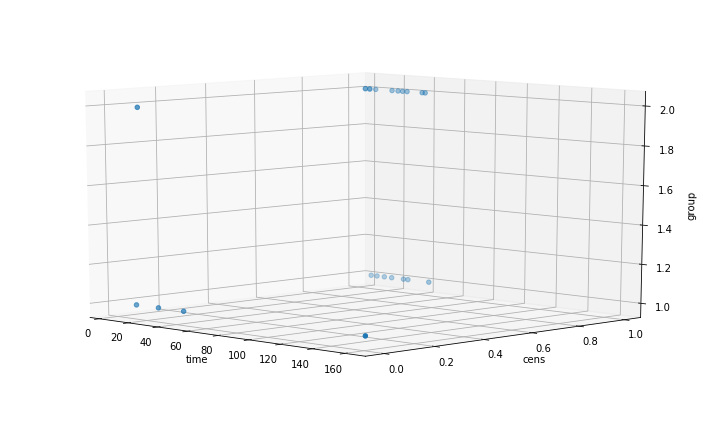

In [532]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df['time'], ys=df['cens'], zs=df['group'])

ax.set_ylabel('cens'); ax.set_xlabel('time'); ax.set_zlabel('group')
ax.view_init(10, -45)

LOOK IN 2D HOW THE INDIVIDUAL FEATURE AFFECTION OUR VARIABLE

Text(0, 0.5, 'group')

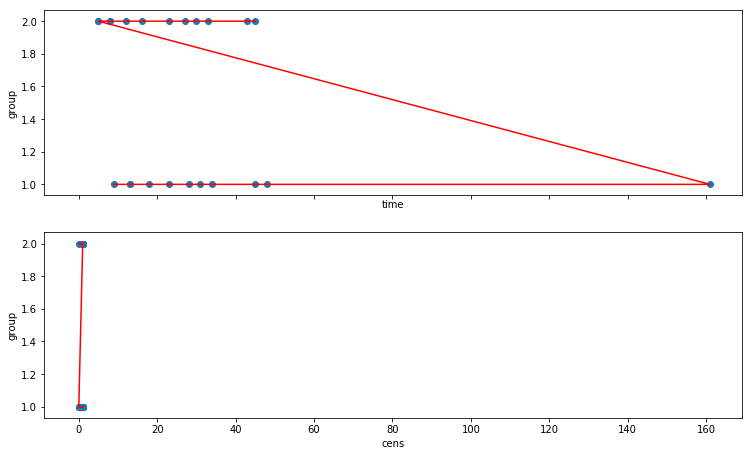

In [538]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].scatter(df['time'], df['group'])
axarr[0].plot(df['time'], df['group'],color='red')
axarr[0].set_ylabel('group')
axarr[0].set_xlabel('time')
axarr[1].scatter(df['cens'], df['group'])
axarr[1].plot(df['cens'], df['group'],color='red')
axarr[1].set_xlabel('cens')
axarr[1].set_ylabel('group')

<strong><font color='magenta'>we have seen that cens histogram is more predictible as it has higher frequency but time didnt so we choose cens as our full data set's feature</font></strong>

In [539]:
X = df.as_matrix(['cens'])
Y = df.as_matrix(['group']).astype('float32')

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<font color='red'>Divide all the datas into traing and testing data</font>

In [540]:
from sklearn.model_selection import train_test_split

In [541]:
X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.9))

In [542]:
X_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

In [543]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [544]:
print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

Score:  -0.5272726966526888


# LETS NOW TAKE OUR PREDICTED MODEL FROM THE TRAING SET

In [545]:
x_line =X_test #scatter points testing data
p = reg.predict(x_line).T # we need a 1-d array for plotting so taking transpose of the predicted model

In [550]:

p

array([[2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        1., 1., 1., 2., 2.]])

# SUB-PLOT PLOTTING

Text(0, 0.5, 'group')

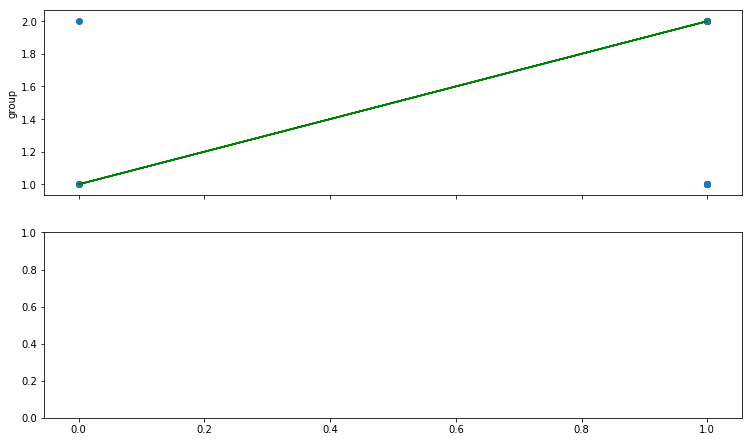

In [547]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].scatter(df['cens'], df['group'])
axarr[0].plot(x_line, p[0],color='green')
axarr[0].set_ylabel('group')


# TESTING OUR PREDICTED MODEL  R- SQUARE SCORE

In [510]:
from sklearn.metrics import r2_score

In [551]:
r2_score(y_test,reg.predict(X_test)) # not a bad score its value should lie between 0.4-1 

-0.5272726966526888

# PLOTTING OF LINEAR REGRESSION MODEL 

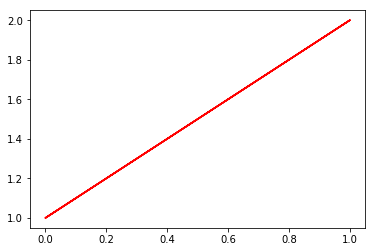

In [553]:
plt.plot(X_test,reg.predict(X_test),color='red')
plt.show()

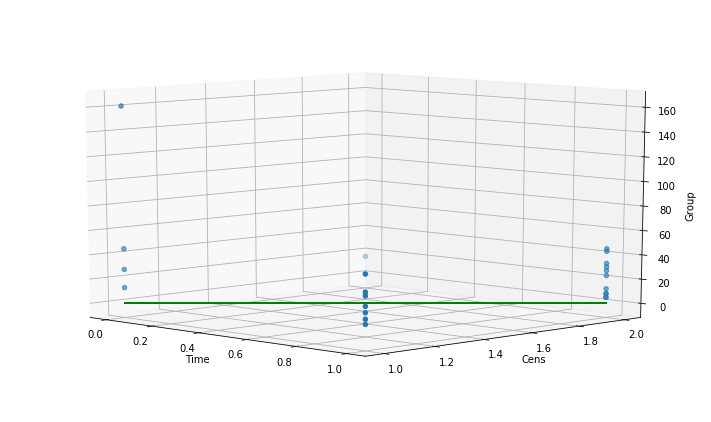

In [561]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=df['cens'], ys=df['group'], zs=df['time'])
ax.set_ylabel('Cens'); ax.set_xlabel('Time'); ax.set_zlabel('Group')
ax.plot(xs=x_line,ys=p[0], color='green')
ax.view_init(10, -45)

# <center><strong><font color='blue'>Prepared by----></font></strong><strong><font color='red'>Arijeet Mukherjee</font></strong></center>